In [95]:
import numpy as np
import matplotlib.pyplot as plt

#### 1) Under no-arbitrage pricing, what is the fair value of a k-years forward contract on the above stock index? Report your answer for k = 1, 2, 3, 4, 5. As a summary, plot the forward price versus k. What does the graph say? (5 Points)

[101.00501670841679, 102.02013400267558, 103.0454533953517, 104.08107741923882, 105.12710963760242]


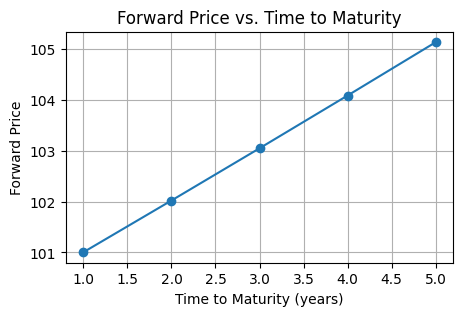

In [106]:
# Given parameters
S0 = 100  # Spot price
r = 0.01  # Risk-free rate
d = 0     # Continuous annual dividend yield
sigma = 0.1  # Volatility

def forward_price(k):
    return S0 * np.exp((r - d) * k)

# Values of k
k_values = np.arange(1, 6)

# Calculate forward prices
forward_prices = [forward_price(k) for k in k_values]
print(forward_prices)
# Plotting
plt.figure(figsize=(5, 3))
plt.plot(k_values, forward_prices, marker='o')
plt.title('Forward Price vs. Time to Maturity')
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Forward Price')
plt.grid(True)
plt.show()


##### The graph shows a linear relationship between the forward price and the time to maturity k, indicating that the forward price increases with time to maturity under no-arbitrage pricing.

#### (2) Repeat the previous part but using Monte Carlo simulation. In particular, you will need to simulate the future price of the index for k = 1, 2, 3, 4, 5 years. Using a boxplot, plot the distribution of the simulated price for each year and highlight the forward price. How does your answer compare with the previous part? (5 Points) Hint: Remember the economic implications of the forward contract.

{1: 101.00501670841679, 2: 102.02013400267558, 3: 103.0454533953517, 4: 104.08107741923882, 5: 105.12710963760242}


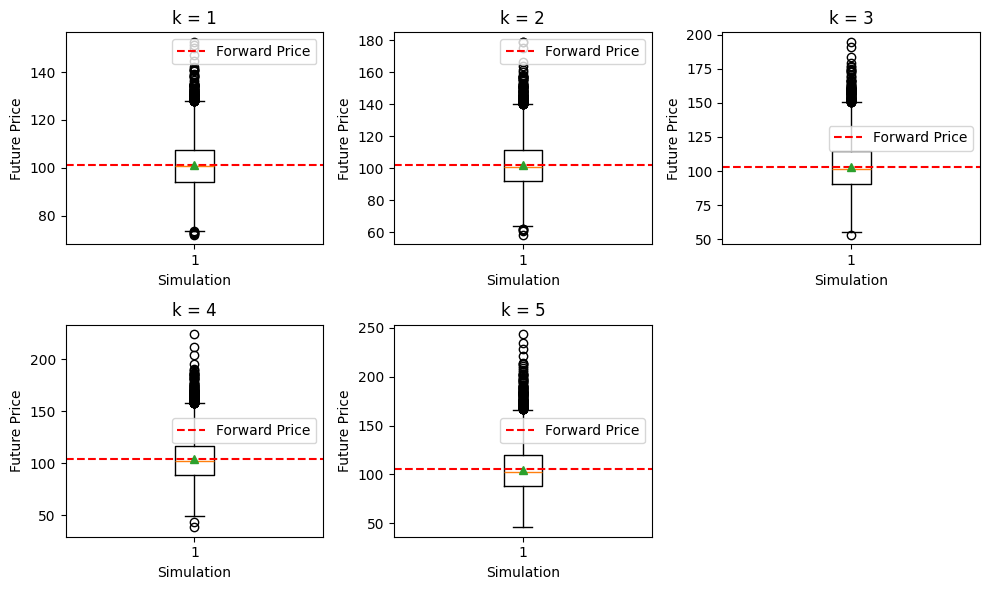

In [97]:
# Given parameters
num_simulations = 10000  # Number of simulations

#future price using geometric Brownian motion
def simulate_future_price(k, num_simulations):
    dt = 1.0 / 252  # Time step (assuming trading days in a year)
    num_steps = int(k * 252)  # Number of steps in simulation
    z = np.random.randn(num_simulations, num_steps)  # Random shocks
    
    # Calculate future prices using geometric Brownian motion
    future_prices = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z, axis=1))
    
    # Extract prices at the end of the simulation period
    final_prices = future_prices[:, -1]
    
    return final_prices

# Values of k
k_values = np.arange(1, 6)

# Simulate future prices for each k
simulated_prices = {k: simulate_future_price(k, num_simulations) for k in k_values}

# Calculate forward prices for each k
forward_prices = {k: S0 * np.exp(r * k) for k in k_values}
print(forward_prices)

# Plot boxplots
plt.figure(figsize=(10, 6))
for i, k in enumerate(k_values):
    plt.subplot(2, 3, i+1)
    plt.boxplot(simulated_prices[k], showmeans=True)
    plt.axhline(forward_prices[k], color='r', linestyle='--', label='Forward Price')
    plt.title(f'k = {k}')
    plt.xlabel('Simulation')
    plt.ylabel('Future Price')
    plt.legend()

plt.tight_layout()
plt.show()


##### As the box plots shift vertically as “k” changes, higher “k” values lead to wider distributions and potentially more extreme outcomes, reflecting the increased uncertainty associated with longer time horizons.

#### (a) Trading Strategy Using Forward Contract:

##### Entering the contract: We can enter into a one-year forward contract to buy the stock index at a predetermined price, let's call it F0, which is agreed upon today. Since we have zero capital, we don't need to pay anything upfront for this contract.
##### Wait for the Stock Market to Go Up: If our prediction is correct and the stock market goes up after one year, the value of the stock index will increase.
##### Exercise the Forward Contract: At the end of the year, we can buy the stock index at the agreed upon price F0, which is lower than the future price (if the market goes up as we predicted). We can then sell the index in the market at the higher price, thus making a profit.
##### Example: We believe that the stock index, which is currently priced at 100, will increase in value over the next year. However, we don't have any capital to invest today. To capitalize on our bullish outlook, we decide to enter into a one-year forward contract for the stock index. Assuming the forward price is the same as the current spot price (i.e., 100), we can enter into the forward contract without any initial investment. The forward contract specifies that we will buy the stock index at 100 one year from now, regardless of its actual future price.

##### After one year:

##### If the stock index price increases to, let's say, 120, we can buy it at the agreed-upon forward price of 100 and immediately sell it in the market for 120, resulting in a profit of 20 per unit of the stock index. If the stock index price decreases or remains the same, we are still obligated to buy it at 100 as per the forward contract. In this case, we may incur a loss if the spot price is lower than 100.

#### (b) Trading Strategy Using Underlying Asset:
##### In this strategy, we will directly invest in the stock index itself.

##### Borrow Capital: Since we have zero capital, we can borrow money at the risk-free rate r.

##### Buy the Stock Index: With the borrowed capital, we can buy the stock index at the spot price of 100.

##### Wait for the Stock Market to Go Up: If our prediction is correct and the stock market goes up after one year, the value of the stock index will increase.

##### Sell the Stock Index: After one year, we can sell the stock index at the higher price, repay the borrowed capital along with the interest, and keep the remaining profit.the remaining profit.the remaining profit. profit.ng profit.t. profit.ng profit.

In [98]:
import numpy as np

# simulate future stock prices using GBM
def simulate_stock_price(spot_price, risk_free_rate, volatility, time):
    drift = (risk_free_rate - 0 - 0.5 * volatility ** 2) * time
    randomness = volatility * np.sqrt(time) * np.random.randn()
    return spot_price * np.exp(drift + randomness)

# calculate profit and loss for forward contract strategy
def forward_contract_pnl(forward_price, future_price):
    return future_price - forward_price

# calculate profit and loss for underlying asset strategy
def underlying_asset_pnl(spot_price, future_price, borrowing_cost):
    return future_price - spot_price - borrowing_cost

def main():
    risk_free_rate = 0.01  # Risk-free rate
    volatility = 0.1       # Volatility
    time = 1.0             # 1 year
    spot_price = 100.0     # Spot price
    forward_price = spot_price+2  # Assume forward price greater than spot price
    borrowing_cost = 0.1   # Initial borrowing cost

    # Monte Carlo simulation parameters
    num_simulations = 100000

    # Perform Monte Carlo simulation
    forward_contract_total_pnl = 0.0
    simulated_forward_contract_pnl = []
    underlying_asset_total_pnl = 0.0
    simulated_underlying_asset_pnl = []
    for _ in range(num_simulations):
        # Simulate future stock prices
        future_price = simulate_stock_price(spot_price, risk_free_rate, volatility, time)

        # Calculate profit and loss for forward contract strategy
        forward_pnl = forward_contract_pnl(forward_price, future_price)
        forward_contract_total_pnl += forward_pnl
        simulated_forward_contract_pnl.append(forward_pnl)

        # Calculate profit and loss for underlying asset strategy
        underlying_pnl = underlying_asset_pnl(spot_price, future_price, borrowing_cost)
        underlying_asset_total_pnl += underlying_pnl
        simulated_underlying_asset_pnl.append(underlying_pnl)

    # Calculate expected P&L
    forward_contract_expected_pnl = forward_contract_total_pnl / num_simulations
    underlying_asset_expected_pnl = underlying_asset_total_pnl / num_simulations

    print("Expected P&L for Forward Contract Strategy:", round(forward_contract_expected_pnl, 2))
    print("Expected P&L for Underlying Asset Strategy:", round(underlying_asset_expected_pnl, 2))
    return simulated_forward_contract_pnl,simulated_underlying_asset_pnl,num_simulations

In [104]:
simulated_forward_contract_pnl,simulated_underlying_asset_pnl,num_simulations = main()
confidence_level = 0.99
var_forward = np.percentile(simulated_forward_contract_pnl, 100 * (1 - confidence_level))
print("VaR of Forward Contract strategy: ",var_forward)
var_underlying = np.percentile(simulated_underlying_asset_pnl, 100 * (1 - confidence_level))
print("VaR of Forward Underlying asset strategy: ",var_underlying)

Expected P&L for Forward Contract Strategy: -0.99
Expected P&L for Underlying Asset Strategy: 0.91
VaR of Forward Contract strategy:  -22.363742685787237
VaR of Forward Underlying asset strategy:  -20.46374268578724


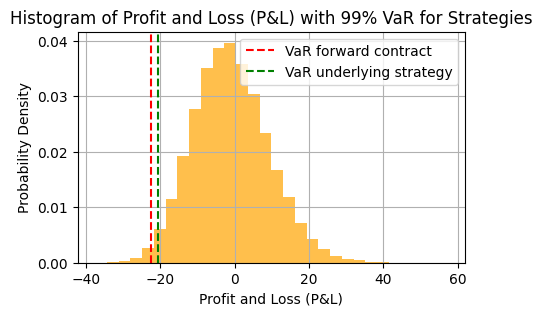

In [107]:
# Plot histogram of simulated P&L values with VaR threshold
plt.figure(figsize=(5, 3))
plt.hist(simulated_forward_contract_pnl, bins=30, density=True, alpha=0.7, color='orange')
plt.axvline(x=var_forward, color='red', linestyle='--', label=f'VaR forward contract')
plt.axvline(x=var_underlying, color='green', linestyle='--', label=f'VaR underlying strategy')

plt.xlabel('Profit and Loss (P&L)')
plt.ylabel('Probability Density')
plt.title('Histogram of Profit and Loss (P&L) with 99% VaR for Strategies')
plt.legend()
plt.grid(True)
plt.show()